## Agent -3

In [15]:
# 环境变量设置
import os
os.environ["OPENAI_API_KEY"] = "sk-xxx"
os.environ["OPENAI_API_BASE"] = "https://api.chatanywhere.tech/v1"
# 搜索api key
os.environ["TAVILY_API_KEY"] = "tvly-xxx"
# Claude Api Key
os.environ["X-Api-Key"] = "sk-ant-xxx"


从不同的维度可以划分不同的Agent类型，主要如下图所示

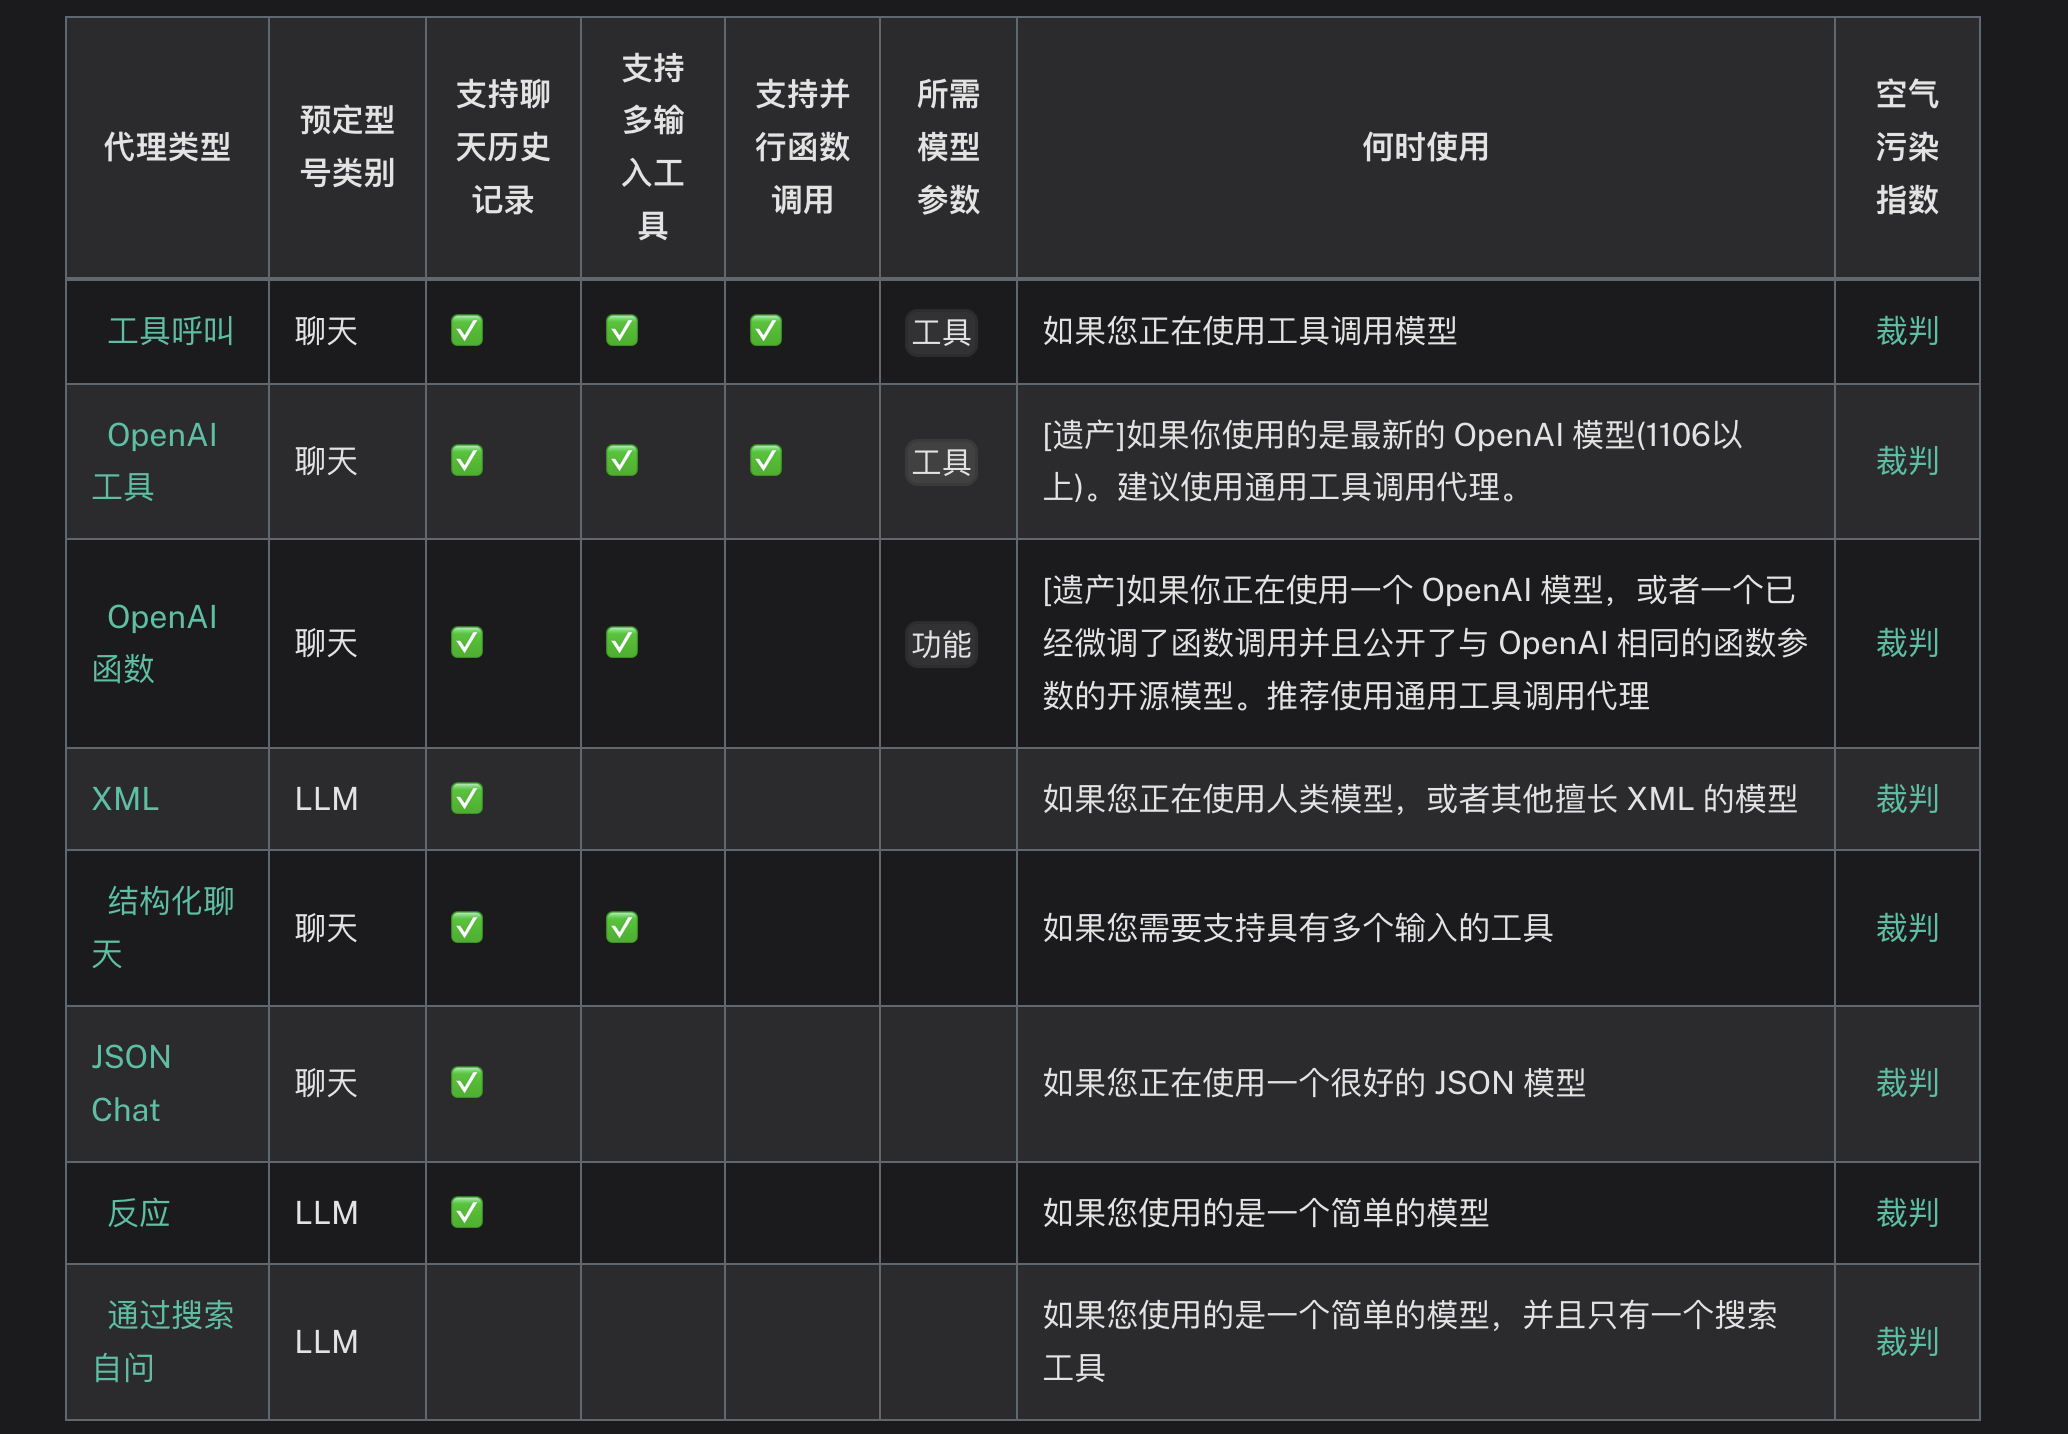

如图所示，现阶段langchain中的agent type主要有以下：
- Tool Calling
- OpenAI Tools
- OpenAI Functions
- XML
- Structured Chat
- JSON Chat
- ReAct
- Self Ask With Search

### Tool calling agent


工具调用允许模型检测何时应该调用一个或多个工具，并使用应该传递给这些工具的输入进行响应。

在 API 调用中，您可以描述工具，并让模型智能地选择输出一个包含参数的结构化对象(如 JSON)来调用这些工具。

工具 API 的目标是比使用通用文本完成或聊天 API 更可靠地返回有效和有用的工具调用

**Tool calling agent 通过create_tool_calling_agent来创建agent，具体的例子在Agent第一个小节已经演示过了**

</br>

### OpenAI tools

> 新的 OpenAI 模型已经进行了微调，以检测何时应该调用一个或多个函数，并使用应该传递给该函数的输入进行响应。

> 在 API 调用中，您可以描述函数，并让模型智能地选择输出一个包含参数的 JSON 对象来调用这些函数。

> OpenAI 工具 API 的目标是比使用通用文本完成或聊天 API 更可靠地返回有效和有用的函数调用。

> 如果您正在使用 OpenAI 模型创建代理，那么您应该使用这个 OpenAI tools代理，而不是 OpenAI function代理。

In [3]:
! pip install --upgrade --quiet  langchain-openai tavily-python

In [6]:
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI

In [7]:
tools = [TavilySearchResults(max_results=1)]

创建代理

In [8]:
# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-tools-agent")

# Choose the LLM that will drive the agent
# Only certain models support this
llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0)

# Construct the OpenAI Tools agent
agent = create_openai_tools_agent(llm, tools, prompt)

运行代理

In [9]:
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": "什么是 LangChain?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'LangChain'}`


[{'url': 'https://www.langchain.com/langchain', 'content': 'Augment the power\nof\xa0LLMs with your data\nLangChain helps connect LLMs to your company’s private sources\nof data and APIs to create context-aware, reasoning applications.\n Our Methods\nReady to start shipping\nreliable GenAI apps faster?\nLangChain and LangSmith are critical parts of the reference\narchitecture to get you from prototype to production. The largest community building the future of LLM apps\nLangChain’s flexible abstractions and AI-first toolkit make it\xa0the\xa0#1\xa0choice for developers when building with GenAI.\n Why choose LangChain?\nLangChain is easy to get started with and\xa0gives\xa0you choice, flexibility, and power as\xa0you scale.\n Get customizability and control with a durable runtime baked in\nLangChain Expression Language (LCEL) lets you build your app in a truly composable way, 

{'input': '什么是 LangChain?',
 'output': 'LangChain 是一种技术，它帮助将 LLMs（Language Model）与公司的私有数据源和 API 进行连接，从而创建具有上下文感知和推理能力的应用程序。LangChain 和 LangSmith 是将原型转化为生产环境的关键部分，它们是构建 GenAI 应用程序的基础架构的重要组成部分。LangChain 提供灵活的抽象和面向 AI 的工具包，使开发人员在构建 GenAI 应用程序时能够获得选择、灵活性和强大的功能。LangChain 还提供了 LangChain Expression Language (LCEL)，让您以真正可组合的方式构建应用程序，从而允许您根据需要进行定制。您可以在以下链接了解更多信息：[LangChain 官方网站](https://www.langchain.com/langchain)。'}

增加聊天记录

In [10]:
from langchain_core.messages import AIMessage, HumanMessage

agent_executor.invoke(
    {
        "input": "我叫什么名字?除非你需要，否则不要使用工具来查找",
        "chat_history": [
            HumanMessage(content="你好，我叫Barry"),
            AIMessage(content="你好Barry，有什么可以帮到您吗?"),
        ],
    }
)



> Entering new AgentExecutor chain...
您叫Barry。有什么其他问题我可以帮您解决吗？

> Finished chain.


{'input': '我叫什么名字?除非你需要，否则不要使用工具来查找',
 'chat_history': [HumanMessage(content='你好，我叫Barry'),
  AIMessage(content='你好Barry，有什么可以帮到您吗?')],
 'output': '您叫Barry。有什么其他问题我可以帮您解决吗？'}

### OpenAI functions

langchain官网中推荐如果使用openai作为模型的话，使用OpenAI tools而不是OpenAI functions

两者之间的区别在于，tools API 允许模型请求同时调用多个函数，这可以减少某些架构中的响应时间。

因此建议使用 OpenAI 模型的工具代理。

In [11]:
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI

tools = [TavilySearchResults(max_results=1)]

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-3.5-turbo-1106")

# Construct the OpenAI Functions agent
agent = create_openai_functions_agent(llm, tools, prompt)
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": "LangChain是什么?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'LangChain'}`


[{'url': 'https://www.langchain.com/', 'content': 'Join Discord\nContribute on GitHub\n5.3M\nMonthly Downloads\n67k\nGithub Stars\n1800+\nContributors\n34k+\nApps Powered\nReady to build?\nGo To Docs\nGo To Docs\nGo To Docs\nContact Sales\nContact Sales\nContact Sales\nProducts and use-cases\nLangChain\nLangSmith\nRetrieval\nAgents\nInspiration\nCode\nGitHub\nLangChain Hub\nPython Docs\nJS/TS Docs\nSocial\nTwitter\nDiscord\nBlog\nLinkedIn\nYouTube\nTerms of Service\nSign up for our newsletter\nProducts and use-cases\nLangChain\nLangSmith\nRetrieval\nAgents\nInspiration\nCode\nGitHub\nLangChain Hub\nPython Docs\nJS/TS Docs\nSocial\nTwitter\nDiscord\nBlog\nLinkedIn\nYouTube\nTerms of Service\nSign up for our newsletter\nProducts and use-cases\nLangChain\nLangSmith\nRetrieval\nAgents\nInspiration\nCode\nGitHub\nLangChain Hub\nPython Docs\nJS/TS Docs\nSocial\nTwitter\nDiscord\nBl

{'input': 'what is LangChain?',
 'output': 'LangChain is a platform that offers a complete set of powerful building blocks for building context-aware, reasoning applications with flexible abstractions and an AI-first toolkit. It allows developers to harness the power and complexity of Large Language Models (LLMs) and provides tools for non-deterministic models. LangChain is used by global corporations, startups, and tinkerers to build innovative applications. You can find more information on their website [here](https://www.langchain.com/).'}

</br>

### XML Agent

有些语言模型(比如 Anthroic 的 Claude)特别擅长推理/编写 XML。

这里讨论了在提示时如何使用使用 XML 的代理。

> 使用小技巧：

> - 与常规 LLM 一起使用，而不是与聊天模型一起使用。

> - 仅与非结构化工具一起使用; 例如，接受单个字符串输入的工具。



In [13]:
! pip install langchain_anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.8/870.8 kB 1.5 MB/s eta 0:00:00a 0:00:01m


In [17]:
from langchain import hub
from langchain.agents import AgentExecutor, create_xml_agent
from langchain_anthropic.chat_models import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults

tools = [TavilySearchResults(max_results=1)]

prompt = hub.pull("hwchase17/xml-agent-convo")

llm = ChatAnthropic(model="claude-2.1")

agent = create_xml_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke({"input": "LangChain是什么?"})





> Entering new AgentExecutor chain...


TypeError: "Could not resolve authentication method. Expected either api_key or auth_token to be set. Or for one of the `X-Api-Key` or `Authorization` headers to be explicitly omitted"

使用聊天记录

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

agent_executor.invoke(
    {
        "input": "what's my name? Only use a tool if needed, otherwise respond with Final Answer",
        # Notice that chat_history is a string, since this prompt is aimed at LLMs, not chat models
        "chat_history": "Human: Hi! My name is Bob\nAI: Hello Bob! Nice to meet you",
    }
)

</br>

### Structured chat

结构化聊天代理能够使用多输入工具。



In [25]:
from langchain import hub
from langchain.agents import AgentExecutor, create_structured_chat_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI


tools = [TavilySearchResults(max_results=1)]
# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/structured-chat-agent")
print('prompt:', prompt.messages)
# Choose the LLM that will drive the agent
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-1106")

# Construct the JSON agent
agent = create_structured_chat_agent(llm, tools, prompt)

# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)
agent_executor.invoke({"input": "LangChain是什么?"})

prompt: [SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['tool_names', 'tools'], template='Respond to the human as helpfully and accurately as possible. You have access to the following tools:\n\n{tools}\n\nUse a json blob to specify a tool by providing an action key (tool name) and an action_input key (tool input).\n\nValid "action" values: "Final Answer" or {tool_names}\n\nProvide only ONE action per $JSON_BLOB, as shown:\n\n```\n{{\n  "action": $TOOL_NAME,\n  "action_input": $INPUT\n}}\n```\n\nFollow this format:\n\nQuestion: input question to answer\nThought: consider previous and subsequent steps\nAction:\n```\n$JSON_BLOB\n```\nObservation: action result\n... (repeat Thought/Action/Observation N times)\nThought: I know what to respond\nAction:\n```\n{{\n  "action": "Final Answer",\n  "action_input": "Final response to human"\n}}\n\nBegin! Reminder to ALWAYS respond with a valid json blob of a single action. Use tools if necessary. Respond directly if appropriate

{'input': 'LangChain是什么?',
 'output': 'LangChain是一个大语言模型开发框架，是LLM（Large Language Model）应用架构的重要一环。它可以将LLM模型、向量数据库、交互层Prompt、外部知识和外部工具整合到一起，从而可以自由构建LLM应用。LangChain还提供了缓存功能和流媒体回应，以及支持多种数据库缓存方案。它的作用可以类比于jquery在前端开发中的角色，使得开发者可以更专注于创新和优化产品功能。'}

</br>

### JSON Chat Agent

有些语言模型特别擅长编写 JSON。该代理使用 JSON 格式化其输出，目的是**支持聊天模型**。

In [67]:
from langchain import hub
from langchain.agents import AgentExecutor, create_json_chat_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

tools = [TavilySearchResults(max_results=1)]

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/react-chat-json")


print('prompt:', prompt.messages)
partial_prompt = prompt.partial(agent_scratchpad='111111{agent_scratchpad}')
print('partial_prompt:', partial_prompt.input_variables)

# print('prompt:', newPrompt.messages)

# Choose the LLM that will drive the agent
llm = ChatOpenAI()
# Construct the JSON agent
# agent = create_json_chat_agent(llm, tools, prompt)
agent = create_json_chat_agent(llm, tools, partial_prompt)

# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)
agent_executor.invoke({"input": "什么是langchanin?"})

prompt: [SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='Assistant is a large language model trained by OpenAI.\n\nAssistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.\n\nAssistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide rang

{'input': '什么是langchanin?',
 'output': 'LangChain is a framework in Python that allows developers to compose chains using the LangChain Expression Language (LCEL) to adapt language models flexibly to specific business contexts. It enables the integration of language models with internal data sources and prompt engineering practices to refine inputs to generative models with specific structure and context.'}

</br>

### ReAct

ReAct论文地址：[https://react-lm.github.io/]

In [40]:
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import OpenAI

tools = [TavilySearchResults(max_results=1)]
# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/react")
# Choose the LLM to use
llm = OpenAI()

# Construct the ReAct agent
agent = create_react_agent(llm, tools, prompt)

# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": "LangChain是什么?今年是公元几年?"})



> Entering new AgentExecutor chain...
 LangChain是一种加密货币，今年是去年的下一年
Action: tavily_search_results_json
Action Input: LangChain[{'url': 'https://github.com/langchain-ai/langchain', 'content': 'About\n⚡ Building applications with LLMs through composability ⚡\nResources\nLicense\nCode of conduct\nSecurity policy\nStars\nWatchers\nForks\nReleases\n291\nPackages\n0\nUsed by 39k\nContributors\n1,848\nLanguages\nFooter\nFooter navigation Latest commit\nGit stats\nFiles\nREADME.md\n🦜️🔗 LangChain\n⚡ Building applications with LLMs through composability ⚡\nLooking for the JS/TS library? ⚡ Building applications with LLMs through composability ⚡\nLicense\nlangchain-ai/langchain\nName already in use\nUse Git or checkout with SVN using the web URL.\n 📖 Documentation\nPlease see here for full documentation, which includes:\n💁 Contributing\nAs an open-source project in a rapidly developing field, we are extremely open to contributions, whether it be in the form of a new feature, improved infrastructur

{'input': 'LangChain是什么?今年是公元几年?', 'output': '今年是公元2022年'}

### Self-ask with search

自问自答带搜索

In [41]:
from langchain import hub
from langchain.agents import AgentExecutor, create_self_ask_with_search_agent
# from langchain_community.llms import Fireworks
from langchain_community.tools.tavily_search import TavilyAnswer

tools = [TavilyAnswer(max_results=1, name="Intermediate Answer")]

prompt = hub.pull("hwchase17/self-ask-with-search")
# Choose the LLM that will drive the agent
# llm = Fireworks()
llm = ChatOpenAI(model='gpt-4-turbo')

# Construct the Self Ask With Search Agent
agent = create_self_ask_with_search_agent(llm, tools, prompt)

# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke(
    {"input": "What is the hometown of the reigning men's U.S. Open champion?"}
)



> Entering new AgentExecutor chain...
Yes.
Follow up: Who is the reigning men's U.S. Open champion?The reigning men's U.S. Open champion is Daniil Medvedev, who won the title in 2021.Are follow-up questions needed here: Yes.
Follow up: What is the hometown of Daniil Medvedev?Daniil Medvedev has set his residence in Monte Carlo.So the final answer is: Monte Carlo

> Finished chain.


{'input': "What is the hometown of the reigning men's U.S. Open champion?",
 'output': 'Monte Carlo'}